<a href="https://colab.research.google.com/github/miky0020/mikhay/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Colab!

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import skimage

In [16]:
from google.colab import files
f = files.upload()

Saving istockphoto-477799262-1024x1024.png to istockphoto-477799262-1024x1024 (2).png


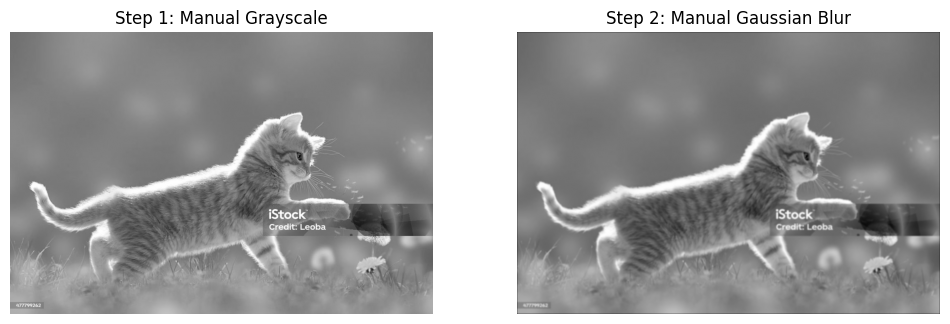

In [25]:
import numpy as np           # NumPy is used for math and handling grids of numbers (arrays)
import matplotlib.pyplot as plt  # This library helps us "draw" the images on the screen
import skimage.io            # Used only to load the image file from your computer

# 1. LOAD THE IMAGE
# We load the image into a variable. It is stored as a 3D grid: Height x Width x Color
img = skimage.io.imread('istockphoto-477799262-1024x1024 (2).png')

# 2. MANUAL GRAYSCALE CONVERSION
# Images usually have 3 colors (Red, Green, Blue). We simplify this to 1 "Brightness" value.
rgb_img = img[:, :, :3]  # Take only the first three layers (ignore transparency if it exists)
h, w, _ = rgb_img.shape   # Get the Height and Width of the image
gray_img = np.zeros((h, w), dtype=np.float32) # Create a blank black image of the same size

# We loop through every single pixel one by one
for i in range(h):           # For every row...
    for j in range(w):       # For every column...
        r, g, b = rgb_img[i, j] # Look at the Red, Green, and Blue values of that pixel
        # Humans see Green as brighter than Blue. This formula mimics how our eyes work:
        gray_img[i, j] = (0.299 * r) + (0.587 * g) + (0.114 * b)

# 3. MANUAL GAUSSIAN BLUR (THE SMOOTHING LOGIC)
def manual_gaussian_blur(image, kernel_size=5, sigma=1.0):

    # --- A. Create the "Blur Brush" (Gaussian Kernel) ---
    # Imagine a small 5x5 grid where the center is a high number and edges are low numbers.
    ax = np.linspace(-(kernel_size // 2), kernel_size // 2, kernel_size)
    gauss = np.exp(-np.square(ax) / (2 * np.power(sigma, 2)))
    kernel = np.outer(gauss, gauss) # This creates a 2D "hill" of numbers
    kernel = kernel / np.sum(kernel) # Make sure the sum is 1 so the image doesn't get brighter



    # --- B. Adding a Border (Padding) ---
    # When the 5x5 brush hits the edge of the image, it hangs off the side.
    # We add a "border" of zeros (black) around the image so the brush always has pixels to read.
    pad = kernel_size // 2
    padded_img = np.zeros((h + 2*pad, w + 2*pad)) # Create a slightly larger blank canvas
    padded_img[pad:-pad, pad:-pad] = image        # Paste our image in the center

    # --- C. Convolution (The Mixing Process) ---
    # This is the "Blurring" step. We slide our 5x5 brush over every pixel.
    output = np.zeros_like(image) # Prepare a blank image for the blurred result

    for i in range(h):
        for j in range(w):
            # 1. Pick up the 5x5 area of pixels around the current spot
            region = padded_img[i : i + kernel_size, j : j + kernel_size]
            # 2. Multiply the pixel brightness by the Gaussian brush weights
            # 3. Sum them up to get a "weighted average" (this creates the blur)
            output[i, j] = np.sum(region * kernel)

    return output



# 4. RUN THE PROCESS
# We send our grayscale image into the blur function.
# Sigma controls how "blurry" it is. A higher sigma = more blur.
blurred_result = manual_gaussian_blur(gray_img, kernel_size=5, sigma=1.5)

# 5. SHOW THE RESULTS
plt.figure(figsize=(12, 6)) # Create a window to show the images

# Show the Grayscale version we made
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Step 1: Manual Grayscale')
plt.axis('off')

# Show the final Blurred version we made
plt.subplot(1, 2, 2)
plt.imshow(blurred_result, cmap='gray')
plt.title('Step 2: Manual Gaussian Blur')
plt.axis('off')

plt.show() # Display everything on the screen

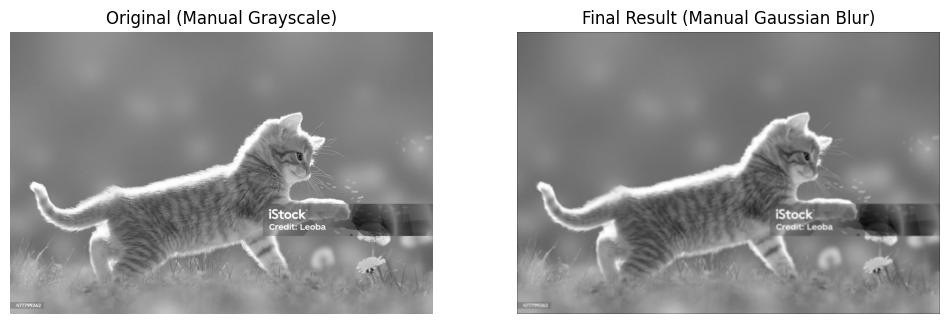

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io

# 1. LOAD IMAGE
# Using skimage.io.imread is usually allowed for loading raw pixel data.
img = skimage.io.imread('istockphoto-477799262-1024x1024 (2).png')

# 2. MANUAL GRAYSCALE CONVERSION
# We extract RGB and apply weights: 0.299*R + 0.587*G + 0.114*B
rgb_img = img[:, :, :3]
h, w, _ = rgb_img.shape
gray_img = np.zeros((h, w), dtype=np.float32)

for i in range(h):
    for j in range(w):
        r, g, b = rgb_img[i, j]
        gray_img[i, j] = 0.299 * r + 0.587 * g + 0.114 * b

# 3. MANUAL GAUSSIAN BLUR (CONVOLUTION)
def manual_gaussian_blur(image, kernel_size=5, sigma=1.0):
    # A. Generate the Gaussian Kernel matrix
    ax = np.linspace(-(kernel_size // 2), kernel_size // 2, kernel_size)
    gauss = np.exp(-np.square(ax) / (2 * np.power(sigma, 2)))
    kernel = np.outer(gauss, gauss)
    kernel = kernel / np.sum(kernel) # Ensure weights sum to 1

    # B. Apply Padding (Zero-padding)
    # This prevents the image from shrinking during convolution
    pad = kernel_size // 2
    padded_img = np.zeros((h + 2*pad, w + 2*pad))
    padded_img[pad:-pad, pad:-pad] = image

    # C. Manual Convolution
    # Slide the kernel over the image and calculate weighted sums
    output = np.zeros_like(image)
    for i in range(h):
        for j in range(w):
            # Neighborhood extraction
            region = padded_img[i : i + kernel_size, j : j + kernel_size]
            # Element-wise multiplication and summation
            output[i, j] = np.sum(region * kernel)

    return output

# 4. EXECUTION
# Adjust sigma to increase or decrease blur intensity
blurred_result = manual_gaussian_blur(gray_img, kernel_size=5, sigma=1.5)

# 5. DISPLAY RESULTS
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Original (Manual Grayscale)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred_result, cmap='gray')
plt.title('Final Result (Manual Gaussian Blur)')
plt.axis('off')

plt.show()

## Google Colab is available in VS Code!
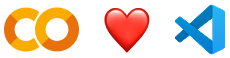

Try the new [Google Colab extension](https://marketplace.visualstudio.com/items?itemName=Google.colab) for Visual Studio Code. You can get up and running in just a few clicks:

*  In VS Code, open the ***Extensions*** view and search for 'Google Colab' to install.
*  Open the kernel selector by creating or opening any `.ipynb` notebook file in your local workspace and either running a cell or clicking the ***Select Kernel*** button in the top right.
*  Click ***Colab*** and then select your desired runtime, sign in with your Google account, and you're all set!

See more details in our [announcement blog here](https://developers.googleblog.com/google-colab-is-coming-to-vs-code).

## 🎁 Free Pro Plan for Gemini & Colab for US College Students 🎓

Get more access to our most accurate model Gemini 3 Pro for advanced coding, complex research, and innovative projects, backed by Colab’s dedicated high-compute resources for data science and machine learning.

Get the Gemini free offer at [gemini.google/students](https://gemini.google/students?utm_source=colab&utm_medium=banner&utm_campaign=students_xpa_us-colab-banner).  
Get the Colab free offer at [colab.research.google.com/signup](https://colab.research.google.com/signup).  
Terms Apply.

## Access popular AI models via Google-Colab-AI Without an API Key
All users have access to most popular LLMs via the `google-colab-ai` Python library, and paid users have access to a wider selection of models. For more details, refer to the [getting started with google colab ai](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Getting_started_with_google_colab_ai.ipynb).



In [19]:
from google.colab import ai
response = ai.generate_text("What is the capital of France?")

## Explore the Gemini API
The Gemini API gives you access to Gemini models created by Google DeepMind. Gemini models are built from the ground up to be multimodal, so you can reason seamlessly across text, images, code, and audio.

**How to get started?**
*  Go to [Google AI Studio](https://aistudio.google.com/) and log in with your Google account.
*  [Create an API key](https://aistudio.google.com/app/apikey).
* Use a quickstart for [Python](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb), or call the REST API using [curl](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb).

**Discover Gemini's advanced capabilities**
*  Play with Gemini [multimodal outputs](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Image-out.ipynb), mixing text and images in an iterative way.
*  Discover the [multimodal Live API](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_LiveAPI.ipynb ) (demo [here](https://aistudio.google.com/live)).
*  Learn how to [analyze images and detect items in your pictures](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Spatial_understanding.ipynb") using Gemini (bonus, there's a [3D version](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Spatial_understanding_3d.ipynb) as well!).
*  Unlock the power of [Gemini thinking model](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_thinking.ipynb), capable of solving complex task with its inner thoughts.
      
**Explore complex use cases**
*  Use [Gemini grounding capabilities](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Search_grounding_for_research_report.ipynb) to create a report on a company based on what the model can find on internet.
*  Extract [invoices and form data from PDF](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Pdf_structured_outputs_on_invoices_and_forms.ipynb) in a structured way.
*  Create [illustrations based on a whole book](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Book_illustration.ipynb) using Gemini large context window and Imagen.

To learn more, check out the [Gemini cookbook](https://github.com/google-gemini/cookbook) or visit the [Gemini API documentation](https://ai.google.dev/docs/).


Colab now has AI features powered by [Gemini](https://gemini.google.com). The video below provides information on how to use these features, whether you're new to Python, or a seasoned veteran.

<center>
  <a href="https://www.youtube.com/watch?v=V7RXyqFUR98" target="_blank">
  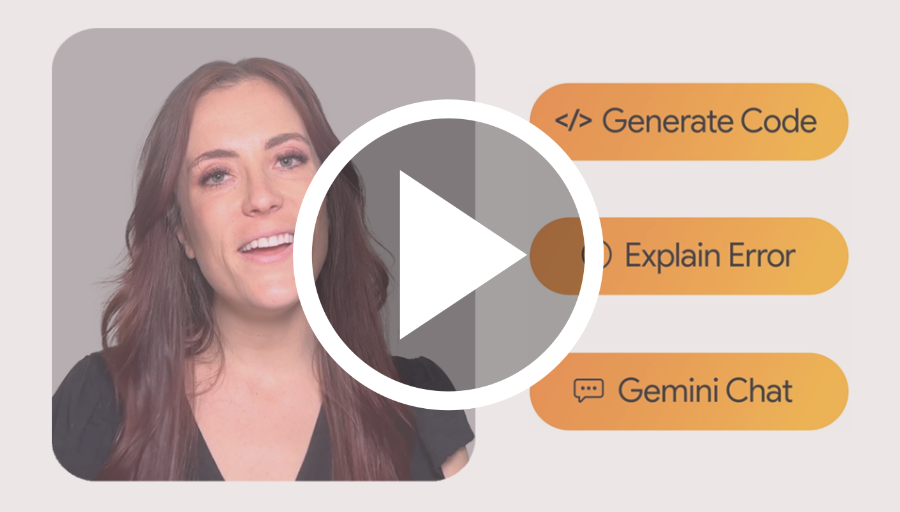
  </a>
</center>

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) or [Colab Features You May Have Missed](https://www.youtube.com/watch?v=rNgswRZ2C1Y) to learn more, or just get started below!

<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [20]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [21]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

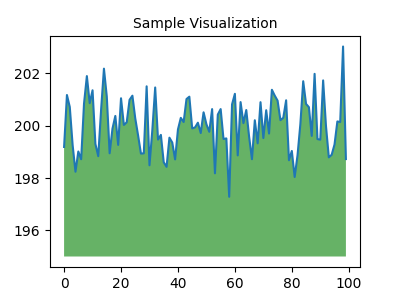

In [22]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

For example, if you find yourself waiting for **pandas** code to finish running and want to go faster, you can switch to a GPU Runtime and use libraries like [RAPIDS cuDF](https://rapids.ai/cudf-pandas) that provide zero-code-change acceleration.

To learn more about accelerating pandas on Colab, see the [10 minute guide](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb) or
 [US stock market data analysis demo](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb).

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning

<div>

These are a few of the notebooks related to Machine Learning, including Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Intro to RAPIDS cuDF to accelerate pandas](https://nvda.ws/rapids-cudf)
- [Getting Started with cuML's accelerator mode](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cuml_sklearn_colab_demo.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TPUs in Colab](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
